Rodrigo Larriba Solemne 2 17/02/2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Cargamos datos.

In [2]:
df = pd.read_csv("Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Observamos que hay 178 datos, y se clasifican en 3 segmentos 

In [3]:
df['Customer_Segment'] 

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

Primeras 7 filas

In [4]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Customer_Segment
1    59
2    71
3    48
dtype: int64


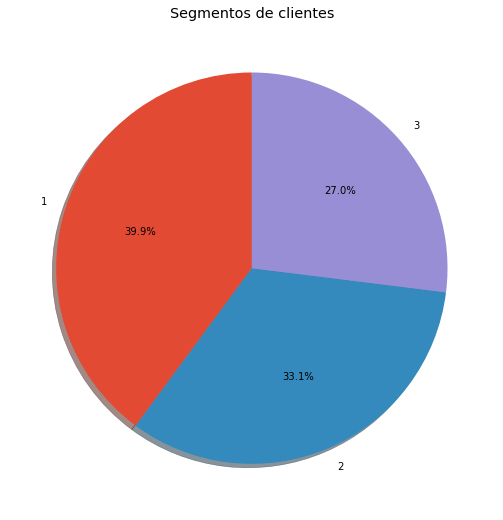

In [8]:
import matplotlib.pyplot as plt
print(df.groupby('Customer_Segment').size())
tipos = df['Customer_Segment'].unique()
total = df['Customer_Segment'].value_counts().tolist()
plt.pie(total, labels=tipos, autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Segmentos de clientes')
plt.show()

Observamos que el segmento de clientes existe una mayor cantidad de consumidores que pertenecen al segmento 1, seguido por el segmento 2 y 1.

In [10]:
#Valores nulos
for feature in df.columns:
    print('Total de valores nulos de', feature, '=', df[feature].isna().sum())

Total de valores nulos de Alcohol = 0
Total de valores nulos de Malic_Acid = 0
Total de valores nulos de Ash = 0
Total de valores nulos de Ash_Alcanity = 0
Total de valores nulos de Magnesium = 0
Total de valores nulos de Total_Phenols = 0
Total de valores nulos de Flavanoids = 0
Total de valores nulos de Nonflavanoid_Phenols = 0
Total de valores nulos de Proanthocyanins = 0
Total de valores nulos de Color_Intensity = 0
Total de valores nulos de Hue = 0
Total de valores nulos de OD280 = 0
Total de valores nulos de Proline = 0
Total de valores nulos de Customer_Segment = 0


No hay existencia de datos nulos en el dataset.

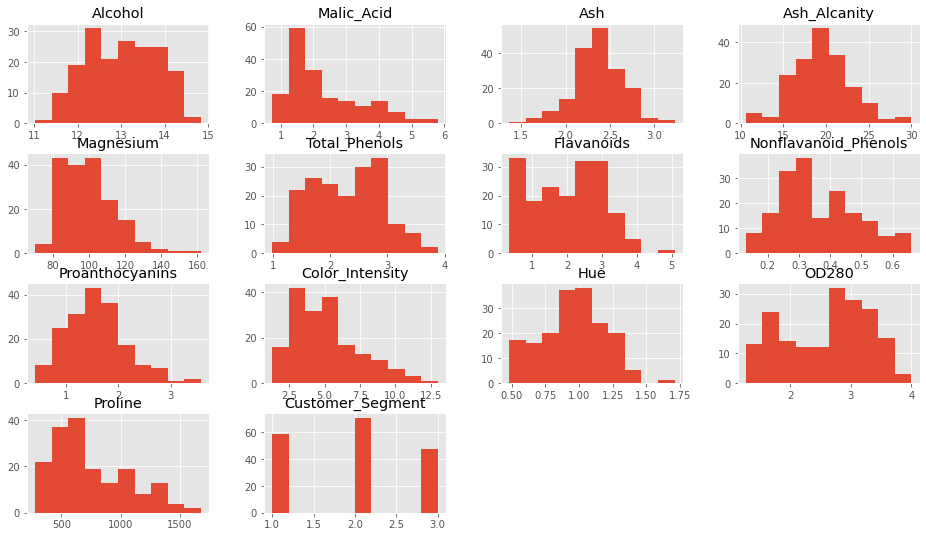

In [11]:
# Revisión de las distribuciones
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
df.hist()
plt.show()

Observamos las distribuciones, se puede observamos que en Proanthocyanins luego de 3 se puede considerar valores atipicos, al igual que en Flavanoids luego de 4, en los demas graficos se puede observamos el comportamiento normal "campana de Gauss".

In [12]:
distorsion = []
K = range(1,10)
for k in K:
    modelo = KMeans(n_clusters=k)
    modelo.fit(df)
    distorsion.append(modelo.inertia_)
#PARA DETERMINAR DISTORCION, PRIMER INTENTO DE ENTRENAMIENTO 
#INDICO UN RANGO 1-10 "EL RANGO ES ELEGIDO AL ASAR"

Para la determinar la distorcion, se utilizo un rango de 1-10 como primer intento de entrenamiento.

In [21]:
X=df.iloc[:,[0,5]].values
X[:10]

array([[14.23,  2.8 ],
       [13.2 ,  2.65],
       [13.16,  2.8 ],
       [14.37,  3.85],
       [13.24,  2.8 ],
       [14.2 ,  3.27],
       [14.39,  2.5 ],
       [14.06,  2.6 ],
       [14.83,  2.8 ],
       [13.86,  2.98]])

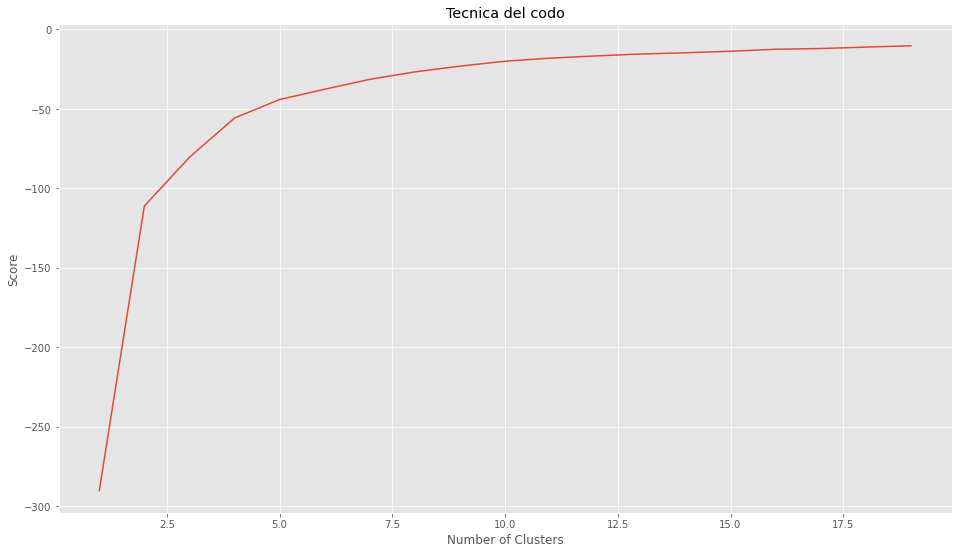

In [20]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Tecnica del codo')
plt.show()

Text(0.5, 1.0, 'Datos de vinos en comun entre Color y Alcohol')

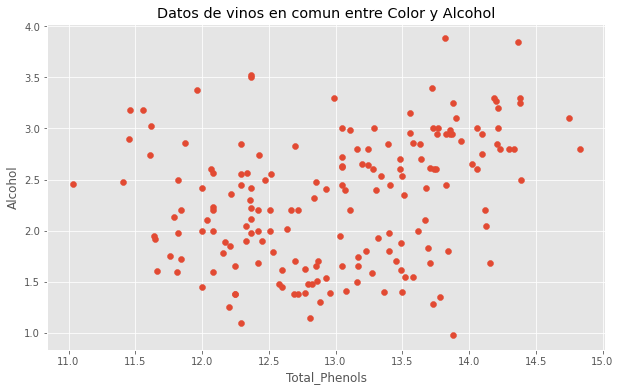

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df['Alcohol'],df['Total_Phenols'])
plt.xlabel('Total_Phenols')
plt.ylabel('Alcohol')
plt.title('Datos de vinos en comun entre Color y Alcohol')

Podemos observar que el quiebe se produce en 3, por lo que nuestro K es 3.

In [24]:
kmeans= KMeans(n_clusters = 4, random_state = 36)

# Calculo de k-means clustering
kmeans.fit(X)

# Calculo de los centros de los clusters y predicción del índice del cluster para cada muestra.
pred = kmeans.predict(X)

pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 1, 3,
       0, 1, 0, 1, 1, 0, 2, 0, 3, 1, 2, 1, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 2, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 1, 2, 1, 3, 3, 1, 0, 3, 3, 3, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 0])

In [25]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
df

Number of data points in each cluster= 
 0    63
1    46
2    44
3    25
Name: Cluster, dtype: int64


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,2


Observamos que la mayor cantidad de datos se encuentran en el centroide 2, de igual manera se evidencia que no hay una gran diferencia entre el centroide 2 y 0 solo 2 datos. 

Text(0.5, 1.0, 'Customer Clusters')

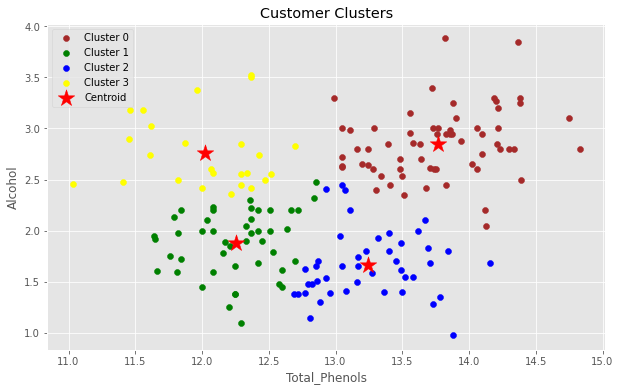

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'yellow', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Total_Phenols')
plt.ylabel('Alcohol')
plt.legend()
plt.title('Customer Clusters')

In [28]:
#Se busca el representante del grupo 
from sklearn.metrics import pairwise_distances_argmin_min
closest, _=pairwise_distances_argmin_min(kmeans.cluster_centers_,X)
closest

array([ 33,  69, 176, 125], dtype=int64)

In [33]:
df[33:34]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Cluster
33,13.76,1.53,2.7,19.5,132,2.95,2.74,0.5,1.35,5.4,1.25,3.0,1235,1,0


In [34]:
df[69:70]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Cluster
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.5,2.85,1.28,3.07,718,2,1


In [37]:
df[176:177]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Cluster
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.6,1.62,840,3,2


In [36]:
df[125:126]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Cluster
125,12.07,2.16,2.17,21.0,85,2.6,2.65,0.37,1.35,2.76,0.86,3.28,378,2,3


Observaciones:
- Los datos agrupados en el cluster 0 tienen el indice mas alto de Alcohol.
- El cluster presenta menores cantidades de Malic_Acid "Acido de los alimentos".
- El color mas fuerte lo posee los datos agrupados en el cluster 0.

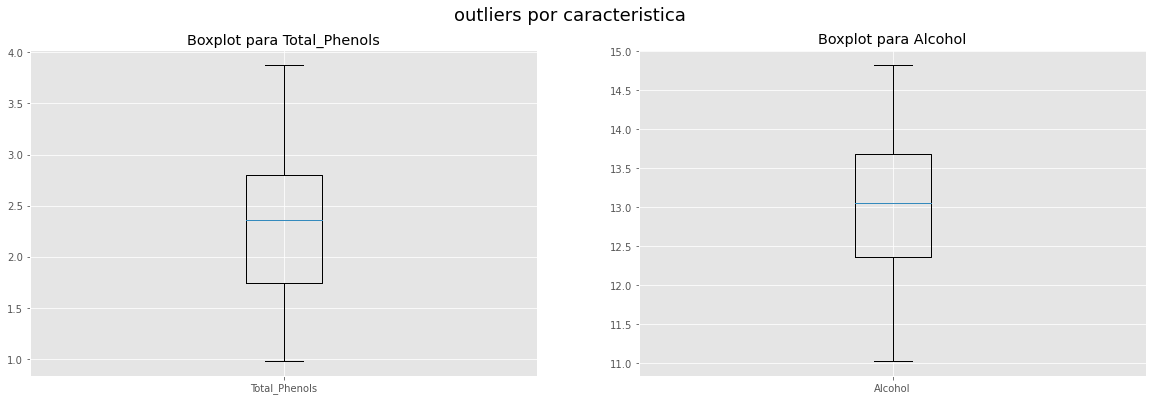

In [38]:
i = 0
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('outliers por caracteristica', fontsize=18)
for col in ['Total_Phenols','Alcohol']:
    ax[i].set_title('Boxplot para ' + col)
    ax[i].boxplot(df[col], labels=[col])  
    i+=1
plt.show()

No hay datos atipicos en las columnas analizadas [Total_Phenols y Alcohol] 

D:\Nueva carpeta\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


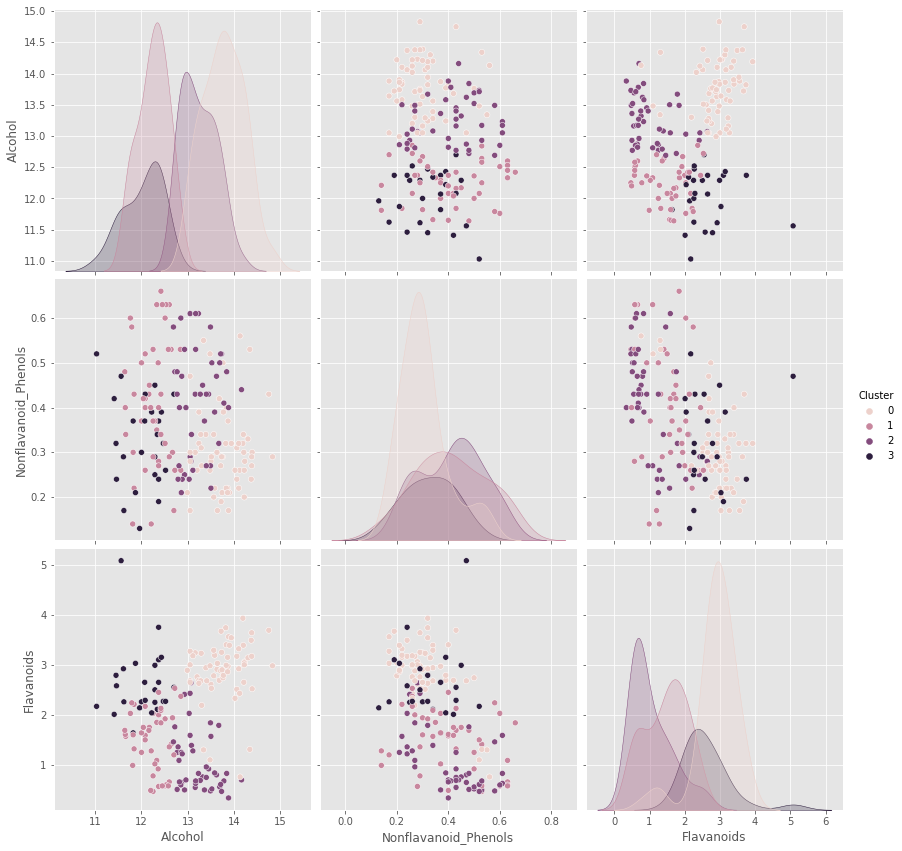

In [39]:
sb.pairplot(df.dropna(), hue='Cluster',size=4,vars=["Alcohol","Nonflavanoid_Phenols","Flavanoids"],kind='scatter')

In [54]:
X = np.array(df[["Total_Phenols","Alcohol","Nonflavanoid_Phenols"]])
y = np.array(df['Customer_Segment'])
X.shape

(178, 3)

In [55]:
means = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.5742     13.0866      0.4308    ]
 [ 2.82742424 13.74439394  0.30393939]
 [ 2.30983871 12.13951613  0.36790323]]


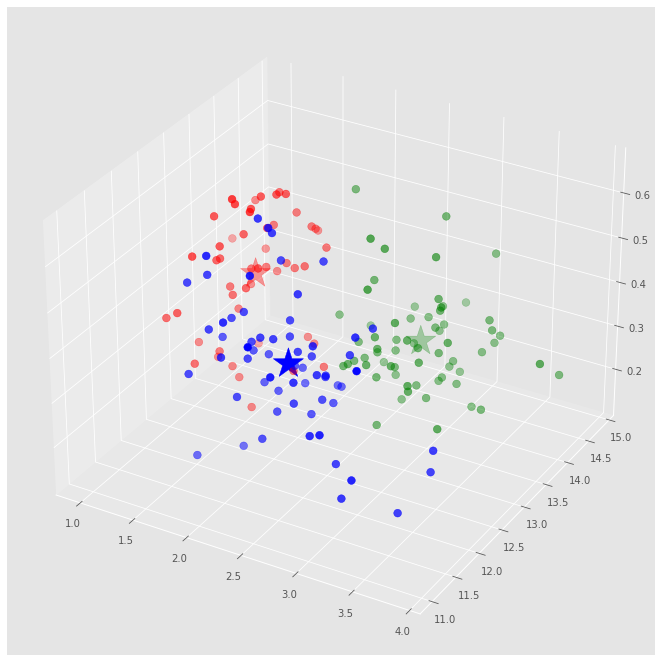

In [57]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

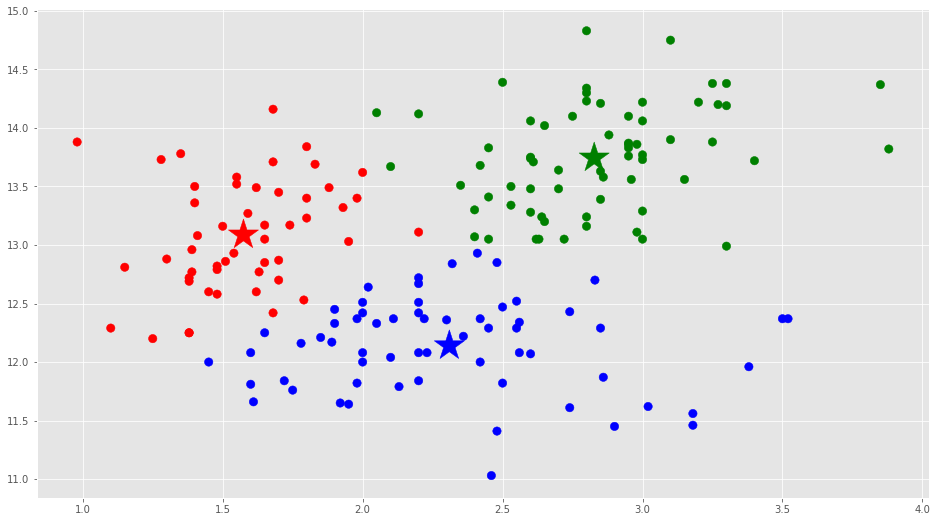

In [58]:
f1 = df['Total_Phenols'].values
f2 = df['Alcohol'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

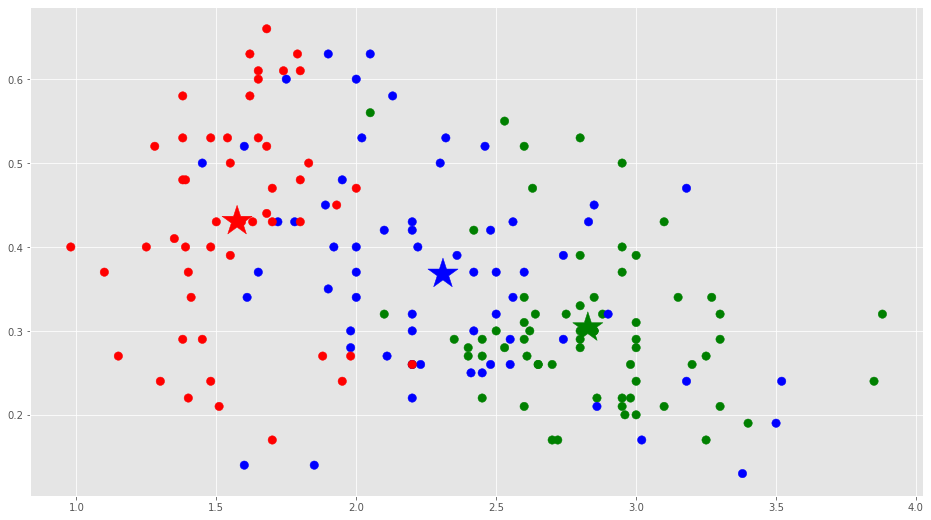

In [59]:
f1 = df['Total_Phenols'].values
f2 = df['Nonflavanoid_Phenols'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

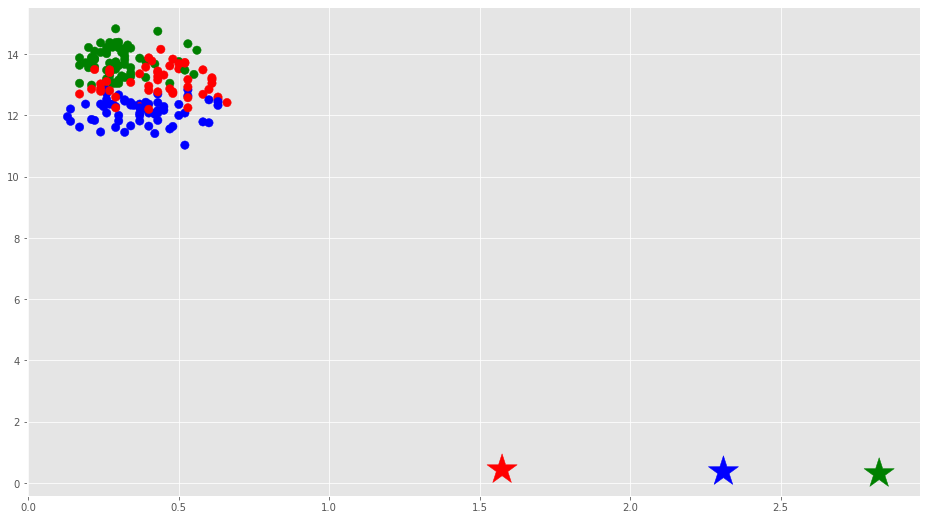

In [60]:
f1 = df['Nonflavanoid_Phenols'].values
f2 = df['Alcohol'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Las 3 columnas a comparar, Total_Phenols, Alcohol y Nonflavanoid_Phenols la que tiene mejor resultado es la primera, debido, a que sus datos estan bien agrupados y se aprecia una divicion clara, si bien , tiene datos dispersos es mucho menor escala con los otros 2 graficos comparativos.
--Total_Phenols Alcohol-*-,  el comparar el alcohol con la totalidad de phenols es fundamental a la hora de apreciar calidad, ya que, segun cuanta cantidad de phenols se use es como varia los diversos resultados de calidad, si agrega menos o mas dependera de los otros compuestos quimicos, pero a ciencia cierta la que tiene mayor relevacia con variacion de calidad es son estos 2, alcohol y phenol, es por eso que utilizamos estos dos datos, incluse tambien si se usa una cantidad exceiva de phenol podria verse afectada la salud de forma negativa, es por eso que estos parametros son muy relevantes a la hora de comparar calidad cumplineto los standares necesarios y no descuidar la salud que es sumamente importante.